# Salary Prediction of Adult with ML

### Prblem Statement:
    1. Prediction task is to determine wheather a person makes over $50k a year
    2. Source: http://archive.ics.uci.edu/ml/datasets/Adult

In [1]:
# Load EDA
import pandas as pd
import numpy as np

In [5]:
# load ML Packages
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

### Attribute Information:

1. age: continuous.
2. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
3. fnlwgt: continuous.
4. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
5. education-num: continuous.
6. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
7. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
8. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
9. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
10. sex: Female, Male.
11. capital-gain: continuous.
12. capital-loss: continuous.
13. hours-per-week: continuous.
14. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [11]:
column_names =["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","class"]

In [44]:
df = pd.read_csv('./Salary Prediction/adult.data', names = column_names)

In [45]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [46]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')

In [47]:
df.shape

(32561, 15)

In [48]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [49]:
#DATA types
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
class             object
dtype: object

### Need to covert categorical value to Numeric

In [50]:
# find all columns that are objects
df.dtypes[df.dtypes == 'object']

workclass         object
education         object
marital-status    object
occupation        object
relationship      object
race              object
sex               object
native-country    object
class             object
dtype: object

In [51]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [52]:
3 # d = {ni: indi for indi, ni in enumerate(set(names))}
d = {v: k for k, v in enumerate(set(df['workclass'].unique()))}

In [53]:
d

{' Self-emp-inc': 0,
 ' ?': 1,
 ' Self-emp-not-inc': 2,
 ' Local-gov': 3,
 ' Federal-gov': 4,
 ' Without-pay': 5,
 ' State-gov': 6,
 ' Private': 7,
 ' Never-worked': 8}

In [54]:
# Function to Assign Numbers to unique categorical values
def generate_dict(data):
    my_dict = {v: k for k, v in enumerate(set(data))}
    return my_dict

In [55]:
generate_dict(df['education'].unique())

{' Assoc-acdm': 0,
 ' Bachelors': 1,
 ' 9th': 2,
 ' 1st-4th': 3,
 ' HS-grad': 4,
 ' 12th': 5,
 ' Doctorate': 6,
 ' 5th-6th': 7,
 ' Assoc-voc': 8,
 ' Some-college': 9,
 ' 7th-8th': 10,
 ' Preschool': 11,
 ' 11th': 12,
 ' Masters': 13,
 ' 10th': 14,
 ' Prof-school': 15}

In [66]:
# Function to assign numbers to all uniue categorical features at a time.
obj_list = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country','class']
obj_name = ['d_workclass','d_education','d_marital_status','d_occupation','d_relationship','d_race','d_sex','d_native_country','d_class']

for i,j in zip(obj_name, obj_list):
    print('{} = generate_dict(df["{}"].unique())'.format(i,j))

d_workclass = generate_dict(df["workclass"].unique())
d_education = generate_dict(df["education"].unique())
d_marital_status = generate_dict(df["marital-status"].unique())
d_occupation = generate_dict(df["occupation"].unique())
d_relationship = generate_dict(df["relationship"].unique())
d_race = generate_dict(df["race"].unique())
d_sex = generate_dict(df["sex"].unique())
d_native_country = generate_dict(df["native-country"].unique())
d_class = generate_dict(df["class"].unique())


In [69]:
d_workclass = generate_dict(df["workclass"].unique())
d_education = generate_dict(df["education"].unique())
d_marital_status = generate_dict(df["marital-status"].unique())
d_occupation = generate_dict(df["occupation"].unique())
d_relationship = generate_dict(df["relationship"].unique())
d_race = generate_dict(df["race"].unique())
d_sex = generate_dict(df["sex"].unique())
d_native_country = generate_dict(df["native-country"].unique())
d_class = generate_dict(df["class"].unique())

In [70]:
d_marital_status

{' Married-spouse-absent': 0,
 ' Divorced': 1,
 ' Never-married': 2,
 ' Separated': 3,
 ' Widowed': 4,
 ' Married-civ-spouse': 5,
 ' Married-AF-spouse': 6}

### Mapping the dataset
1. Method 1: using map function
2. Method 2 using get_dummies

In [71]:
df2 =df

In [72]:
df2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [73]:
df2["workclass"] = df2["workclass"].map(d_workclass)
df2["education"] = df2["education"].map(d_education)
df2["marital-status"] = df2["marital-status"].map(d_marital_status)
df2["occupation"] = df2["occupation"].map(d_occupation)
df2["relationship"] = df2["relationship"].map(d_relationship)
df2["race"] = df2["race"].map(d_race)
df2["sex"] = df2["sex"].map(d_sex)
df2["native-country"] = df2["native-country"].map(d_native_country)
df2["class"] = df2["class"].map(d_class)

In [74]:
df2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,6,77516,1,13,2,1,3,4,1,2174,0,40,7,1
1,50,2,83311,1,13,5,10,2,4,1,0,0,13,7,1
2,38,7,215646,4,9,1,12,3,4,1,0,0,40,7,1
3,53,7,234721,12,7,5,12,2,0,1,0,0,40,7,1
4,28,7,338409,1,13,5,14,0,0,0,0,0,40,2,1


In [75]:
df2.to_csv("Adult_salary_Dataset.csv")

In [76]:
df2.dtypes

age               int64
workclass         int64
fnlwgt            int64
education         int64
education-num     int64
marital-status    int64
occupation        int64
relationship      int64
race              int64
sex               int64
capital-gain      int64
capital-loss      int64
hours-per-week    int64
native-country    int64
class             int64
dtype: object

### Using Dummies

In [77]:
# pd.get-dummies(data =df, columns=['Col 1','col 2'...])

In [78]:
# Load data Viz Pkgs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Correlation plot

In [79]:
corr_mat =df2.corr()

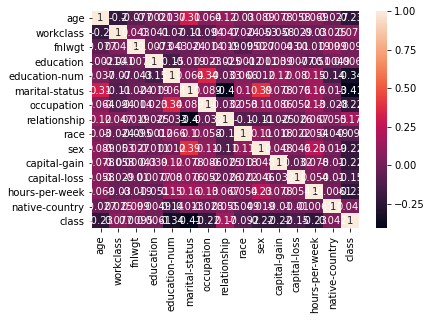

In [80]:
#plot with seaborn
sns.heatmap(corr_mat, annot=True)

<Figure size 1440x720 with 0 Axes>

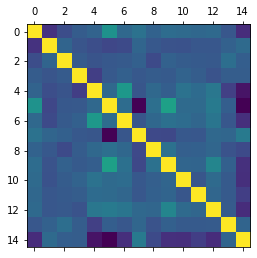

In [83]:
# plot with matplotlib
plt.figure(figsize=(20,10))
plt.matshow(corr_mat)
plt.show()

In [85]:
# value counts
df2['class'].value_counts()

1    24720
0     7841
Name: class, dtype: int64

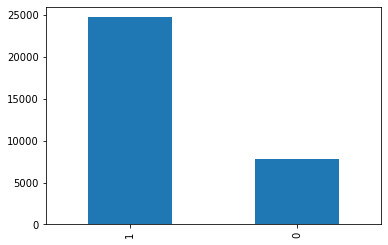

In [86]:
df2['class'].value_counts().plot(kind='bar')

### Machine Learning Aspects

In [87]:
df2.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')

In [88]:
df2.shape

(32561, 15)

In [89]:
df2.iloc[:,0:14].columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [90]:
df2.iloc[:,14].name

'class'

In [91]:
X = df2.iloc[:,0:14].values
y = df2.iloc[:,14].values

### Split Dataset into Train Test Dataset

In [93]:
# Split Dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state =42)

In [95]:
import warnings
warnings.filterwarnings('ignore')

In [96]:
print(x_train.shape)
print(y_train.shape)

(21815, 14)
(21815,)


# Logistic Regression

In [97]:
logit = LogisticRegression()
logit.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [98]:
# Accuracy
logit.score(x_test,y_test)

0.8063465475525777

In [99]:
# Saving model
from sklearn.externals import joblib

In [101]:
salary_logit_model = open("models/salry_logit_model.pkl","wb")
joblib.dump(logit, salary_logit_model)
salary_logit_model.close()

# Naive Bayes

In [102]:
nv = MultinomialNB()
nv.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [103]:
nv.score(x_test,y_test)

0.7863391029220175

In [104]:
salary_nv_model = open("models/salary_nv_model.pkl","wb")
joblib.dump(nv, salary_nv_model)
salary_nv_model.close()

# Random Forest

In [105]:
rf = RandomForestClassifier(n_estimators=100, max_depth=4)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [106]:
rf.score(x_test,y_test)

0.8490601153917737

In [107]:
salary_rf_model = open("models/salary_rf_model.pkl","wb")
joblib.dump(rf, salary_rf_model)
salary_rf_model.close()

# Cross Validation

In [109]:
cv_score = cross_val_score(LogisticRegression(),X,y,cv =10)
print(cv_score)
print('Mean Score: ',np.mean(cv_score))

[0.80288609 0.80036855 0.80159705 0.79791155 0.80773956 0.81081081
 0.79545455 0.80620393 0.80497543 0.80006143]
Mean Score:  0.8028008941618092


In [110]:
cv_score1 = cross_val_score(MultinomialNB(),X,y,cv =10)
print(cv_score1)
print('Mean Score: ',np.mean(cv_score1))

[0.78200798 0.78194103 0.77886978 0.77948403 0.78101966 0.79084767
 0.77364865 0.78163391 0.78409091 0.79207617]
Mean Score:  0.7825619776418057


In [111]:
cv_score2 = cross_val_score(RandomForestClassifier(n_estimators=100, max_depth=4),X,y,cv =10)
print(cv_score2)
print('Mean Score: ',np.mean(cv_score2))

[0.83911575 0.85012285 0.8519656  0.84613022 0.85350123 0.85288698
 0.8470516  0.85687961 0.8531941  0.84244472]
Mean Score:  0.8493292654867725


### Interpreting the Model

In [113]:
import eli5

Using TensorFlow backend.


In [114]:
# Showing the weight for our model
eli5.show_weights(logit, top=10)

In [115]:
d_class

{' >50K': 0, ' <=50K': 1}

In [117]:
df2.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')

In [118]:
feature_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']

In [119]:
class_names=["<=50k",">50k"]

In [121]:
# Clearly Define Feature Names
eli5.show_weights(logit, feature_names=feature_names, target_names=class_names)

Weight?,Feature
+0.034,native-country
+0.030,workclass
+0.027,education
+0.020,relationship
+0.010,race
+0.006,hours-per-week
+0.004,<BIAS>
+0.002,age
+0.002,education-num
+0.000,fnlwgt


In [122]:
x_test[10]

array([    43,      2, 241895,      1,     13,      2,      9,      3,
            4,      1,      0,      0,     42,      7], dtype=int64)

In [123]:
#Reshape to A single Sample (1, -1)
my_sample = np.array(x_test[10]).reshape(1,-1)

In [124]:
logit.predict(my_sample)

array([1], dtype=int64)

#### Narative
1. Made les than 50k for salary (0)
2. <=50k Salary

In [130]:
# Show Explaination for a single Prediction
eli5.show_prediction(logit, x_test[10], feature_names=feature_names, target_names=class_names)

In [131]:
#Show as show_weights
eli5.explain_weights(logit)

Weight?,Feature
+0.034,x13
+0.030,x1
+0.027,x3
+0.020,x7
+0.010,x8
+0.006,x12
+0.004,<BIAS>
+0.002,x0
+0.002,x4
+0.000,x2
